In [2]:
# import dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.stats import linregress

## Correlation Heat Map

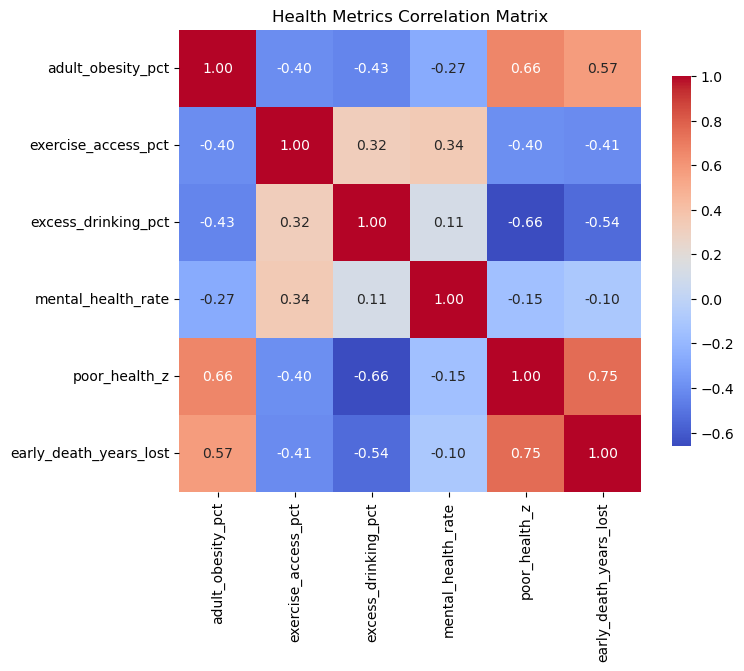

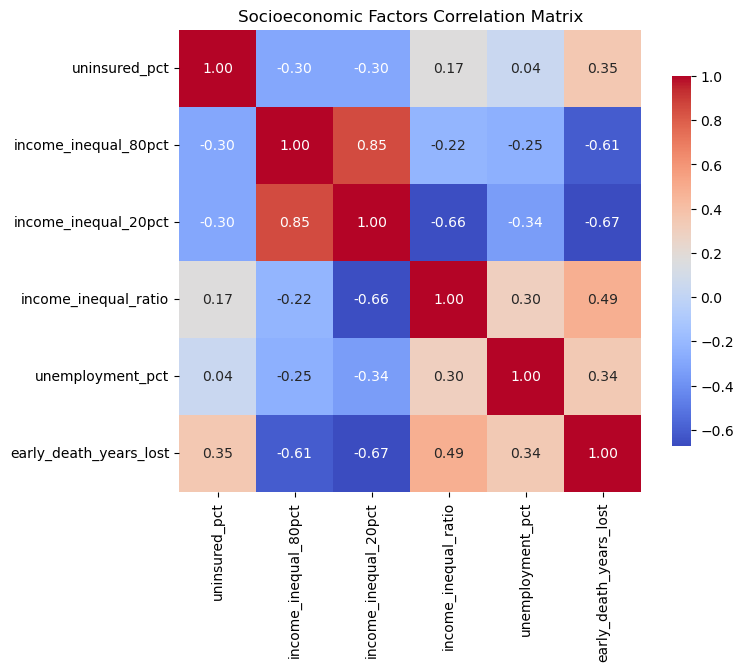

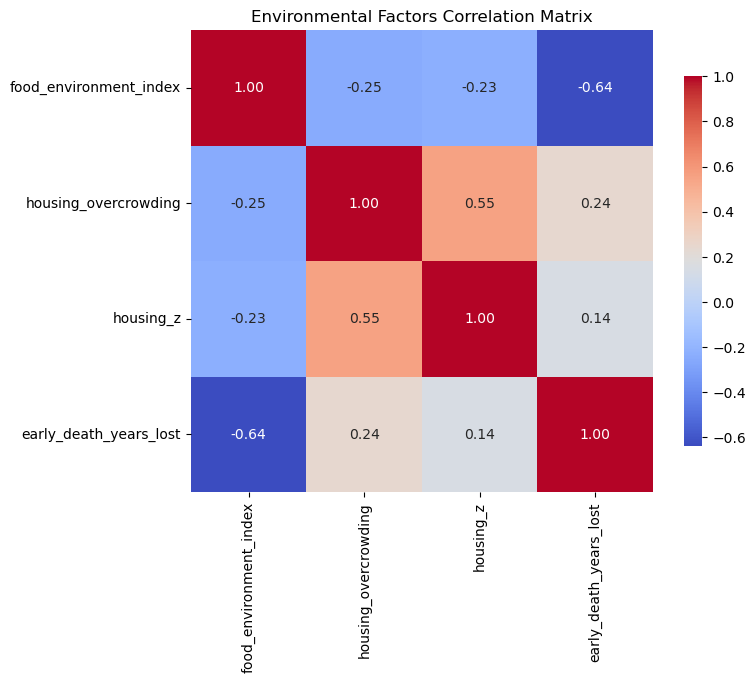

In [39]:
# Import data from county_data csv file
county_data = pd.read_csv('Resources/county_data.csv')
county_df = pd.DataFrame(county_data)

state_data = pd.read_csv('Resources/state_data.csv')
state_df = pd.DataFrame(state_data)
# Select only numerical columns
numerical_df = county_df.select_dtypes(include=['number'])
#print(numerical_df.columns)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

health_metrics = ['adult_obesity_pct', 'exercise_access_pct', 'excess_drinking_pct', 'mental_health_rate', 'poor_health_z','early_death_years_lost']
socioeconomic_factors = ['uninsured_pct', 'income_inequal_80pct', 'income_inequal_20pct', 'income_inequal_ratio', 'unemployment_pct','early_death_years_lost']
environmental_factors = ['food_environment_index', 'housing_overcrowding', 'housing_z','early_death_years_lost']

# Create smaller correlation matrices
health_corr = correlation_matrix.loc[health_metrics, health_metrics]
socioeconomic_corr = correlation_matrix.loc[socioeconomic_factors, socioeconomic_factors]
environmental_corr = correlation_matrix.loc[environmental_factors, environmental_factors]

# Function to plot heatmap
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(8, 6))  # Adjust size as needed
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title(title)
    plt.show()

# Plot each heatmap
plot_heatmap(health_corr, 'Health Metrics Correlation Matrix')
plot_heatmap(socioeconomic_corr, 'Socioeconomic Factors Correlation Matrix')
plot_heatmap(environmental_corr, 'Environmental Factors Correlation Matrix')

#Poor mental health and poor physical health vs adult obesity pct
#early_death_years_lost vs food_environment_index,income_inequal cols, adult obesity, excess drinking, poor mental and physical health

In [4]:
#Drop data where the county name is N/A
county_df = county_df.dropna(subset=['county']).copy()

## Some initial county level analyses

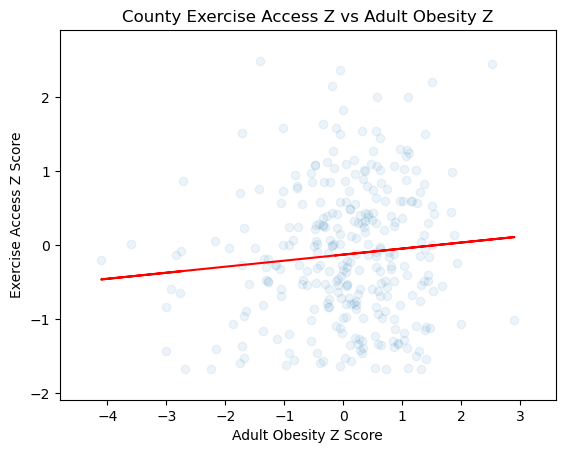

The r^2 value is: 0.009007383019469248


In [52]:
#Exploring County Level Obesity Z vs Exercise Access Z
county_df = county_df.dropna(subset=['adult_obesity_z','exercise_access_z']).copy()
x_values = county_df['adult_obesity_z'].sample(300)
y_values = county_df['exercise_access_z'].sample(300)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

padding_x = 0.1 * (max(x_values) - min(x_values))  # 10% padding for x-axis
padding_y = 0.1 * (max(y_values) - min(y_values))  # 10% padding for y-axis

plt.xlim(min(x_values) - padding_x, max(x_values) + padding_x)
plt.ylim(min(y_values) - padding_y, max(y_values) + padding_y)

plt.title('County Exercise Access Z vs Adult Obesity Z')
plt.xlabel('Adult Obesity Z Score')
plt.ylabel('Exercise Access Z Score')
plt.scatter(x_values, y_values, alpha=.08)
plt.plot(x_values, regress_values, "r-")  # Plot the regression line
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")  # Annotate the line equation

# Call plt.show() as a function to display the plot
plt.show()
print(f'The r^2 value is: {rvalue**2}')

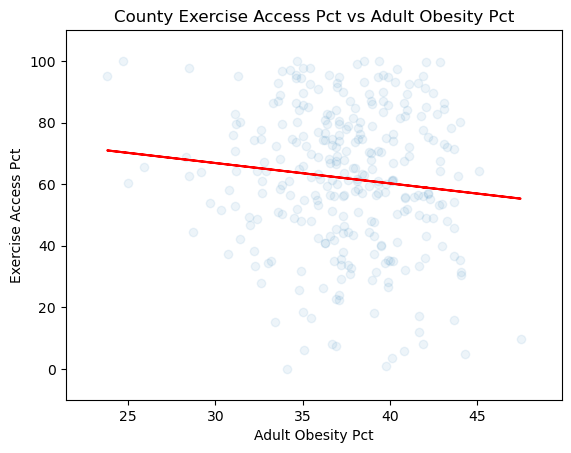

The r^2 value is: 0.012047941921155585


In [53]:
#Exploring County Level Obesity Pct vs Exercise Access Pct
county_df = county_df.dropna(subset=['adult_obesity_pct','exercise_access_pct']).copy()
x_values = county_df['adult_obesity_pct'].sample(300)
y_values = county_df['exercise_access_pct'].sample(300)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

padding_x = 0.1 * (max(x_values) - min(x_values))  # 10% padding for x-axis
padding_y = 0.1 * (max(y_values) - min(y_values))  # 10% padding for y-axis

plt.xlim(min(x_values) - padding_x, max(x_values) + padding_x)
plt.ylim(min(y_values) - padding_y, max(y_values) + padding_y)

plt.title('County Exercise Access Pct vs Adult Obesity Pct')
plt.xlabel('Adult Obesity Pct')
plt.ylabel('Exercise Access Pct')
plt.scatter(x_values, y_values, alpha=0.08)
plt.plot(x_values, regress_values, "r-")  # Plot the regression line
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")  # Annotate the line equation

# Call plt.show() as a function to display the plot
plt.show()
print(f'The r^2 value is: {rvalue**2}')

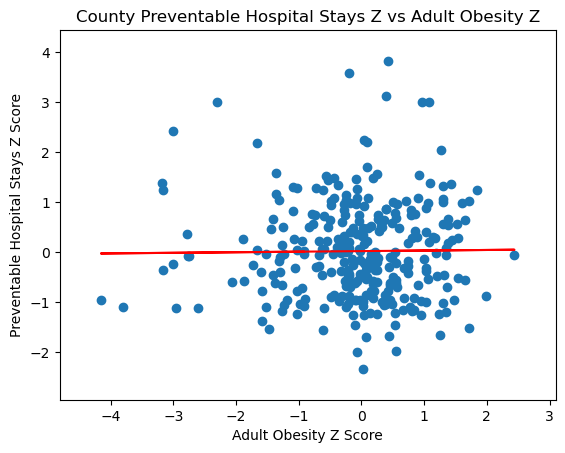

The r^2 value is: 0.000146038486653686


In [54]:
#Exploring County Level Obesity Z vs Preventable Hospital Stays Z
county_df = county_df.dropna(subset=['adult_obesity_z','prevent_hospital_z']).copy()
x_values = county_df['adult_obesity_z'].sample(300)
y_values = county_df['prevent_hospital_z'].sample(300)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

padding_x = 0.1 * (max(x_values) - min(x_values))  # 10% padding for x-axis
padding_y = 0.1 * (max(y_values) - min(y_values))  # 10% padding for y-axis

plt.xlim(min(x_values) - padding_x, max(x_values) + padding_x)
plt.ylim(min(y_values) - padding_y, max(y_values) + padding_y)

plt.title('County Preventable Hospital Stays Z vs Adult Obesity Z')
plt.xlabel('Adult Obesity Z Score')
plt.ylabel('Preventable Hospital Stays Z Score')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Plot the regression line
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")  # Annotate the line equation

# Call plt.show() as a function to display the plot
plt.show()
print(f'The r^2 value is: {rvalue**2}')

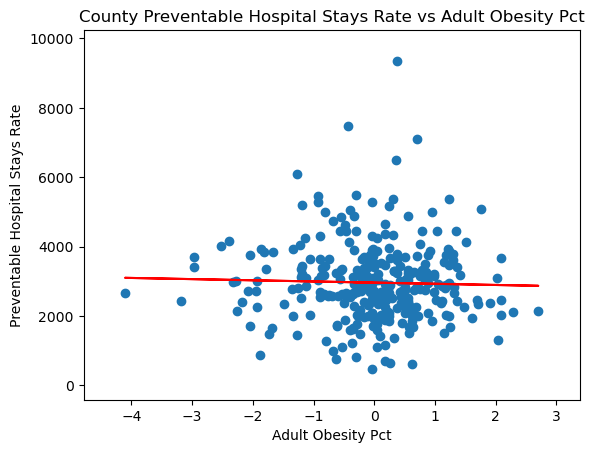

The r^2 value is: 0.0008679424550299652


In [55]:
#Exploring County Level Obesity Pct vs Preventable Hospital Stays Rate
county_df = county_df.dropna(subset=['adult_obesity_pct','prevent_hospital_rate']).copy()
x_values = county_df['adult_obesity_z'].sample(300)
y_values = county_df['prevent_hospital_rate'].sample(300)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

padding_x = 0.1 * (max(x_values) - min(x_values))  # 10% padding for x-axis
padding_y = 0.1 * (max(y_values) - min(y_values))  # 10% padding for y-axis

plt.xlim(min(x_values) - padding_x, max(x_values) + padding_x)
plt.ylim(min(y_values) - padding_y, max(y_values) + padding_y)

plt.title('County Preventable Hospital Stays Rate vs Adult Obesity Pct')
plt.xlabel('Adult Obesity Pct')
plt.ylabel('Preventable Hospital Stays Rate')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Plot the regression line
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")  # Annotate the line equation

# Call plt.show() as a function to display the plot
plt.show()
print(f'The r^2 value is: {rvalue**2}')

## Initial State Level Analyses

In [49]:
#Import data from state_data csv file

state_data = pd.read_csv('Resources/state_data.csv')
state_df = pd.DataFrame(state_data)
state_df.head()

,fips,state,county,adult_obesity_pct,adult_obesity_z,food_environment_index,food_environment_index_z,exercise_access_pct,exercise_access_z,excess_drinking_pct,...,poor_mental_health_z,dentists_ratio,dentists_num,dentists_rate,exercise_access_pct.1,unemployment_num,unemployment_pct,poor_physical_health_avg_days,housing_inad_facil,housing_overcrowding
0,1000,Alabama,NaN,40.6,NaN,5.4,NaN,61.333795,NaN,14.477526,...,NaN,2016:1,2517.0,49.60294,61.333795,59363.0,2.596766,3.934735,0.856498,1.665074
1,2000,Alaska,NaN,33.4,NaN,7.0,NaN,78.230166,NaN,19.610502,...,NaN,954:1,769.0,104.82795,78.230166,14401.0,4.036109,3.564454,4.222592,6.475948
2,4000,Arizona,NaN,31.8,NaN,6.9,NaN,85.470087,NaN,18.807308,...,NaN,1509:1,4876.0,66.25723,85.470087,138129.0,3.820823,3.533107,1.171773,4.407342
3,5000,Arkansas,NaN,39.3,NaN,4.7,NaN,63.604208,NaN,15.417446,...,NaN,2044:1,1490.0,48.92244,63.604208,45420.0,3.316846,4.332924,1.174239,2.776484
4,6000,California,NaN,27.8,NaN,8.6,NaN,94.229806,NaN,17.245677,...,NaN,1076:1,36261.0,92.90702,94.229806,811077.0,4.212955,3.116360,1.304156,8.209804


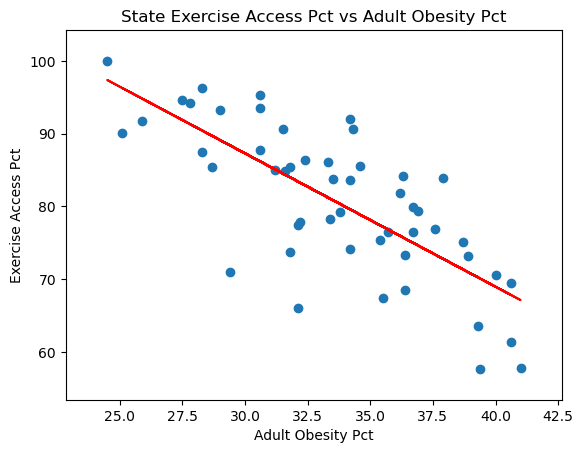

The r^2 value is: 0.5602325540057551


In [50]:
#Exploring State Level Obesity Z vs Exercise Access Z
state_df = state_df.dropna(subset=['adult_obesity_pct','exercise_access_pct']).copy()
x_values = state_df['adult_obesity_pct']
y_values = state_df['exercise_access_pct']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

padding_x = 0.1 * (max(x_values) - min(x_values))  # 10% padding for x-axis
padding_y = 0.1 * (max(y_values) - min(y_values))  # 10% padding for y-axis

plt.xlim(min(x_values) - padding_x, max(x_values) + padding_x)
plt.ylim(min(y_values) - padding_y, max(y_values) + padding_y)

plt.title('State Exercise Access Pct vs Adult Obesity Pct')
plt.xlabel('Adult Obesity Pct')
plt.ylabel('Exercise Access Pct')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Plot the regression line
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")  # Annotate the line equation

# Call plt.show() as a function to display the plot
plt.show()
print(f'The r^2 value is: {rvalue**2}')

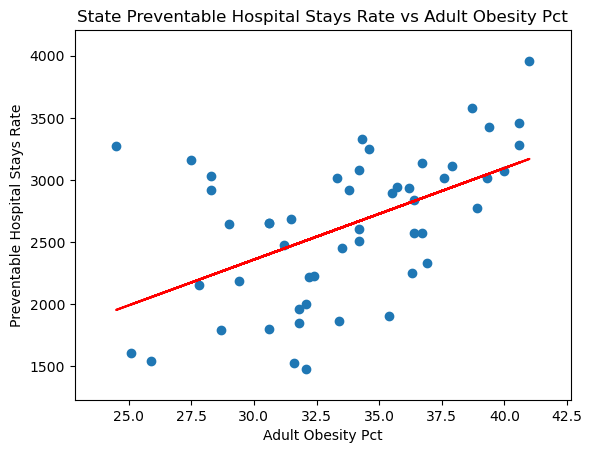

The r^2 value is: 0.26996565016041585


In [55]:
#Exploring State Level Obesity Pct vs Preventable Hospital Stays Rate
state_df = state_df.dropna(subset=['adult_obesity_pct','prevent_hospital_rate']).copy()
x_values = state_df['adult_obesity_pct']
y_values = state_df['prevent_hospital_rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

padding_x = 0.1 * (max(x_values) - min(x_values))  # 10% padding for x-axis
padding_y = 0.1 * (max(y_values) - min(y_values))  # 10% padding for y-axis

plt.xlim(min(x_values) - padding_x, max(x_values) + padding_x)
plt.ylim(min(y_values) - padding_y, max(y_values) + padding_y)

plt.title('State Preventable Hospital Stays Rate vs Adult Obesity Pct')
plt.xlabel('Adult Obesity Pct')
plt.ylabel('Preventable Hospital Stays Rate')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Plot the regression line
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")  # Annotate the line equation

# Call plt.show() as a function to display the plot
plt.show()
print(f'The r^2 value is: {rvalue**2}')

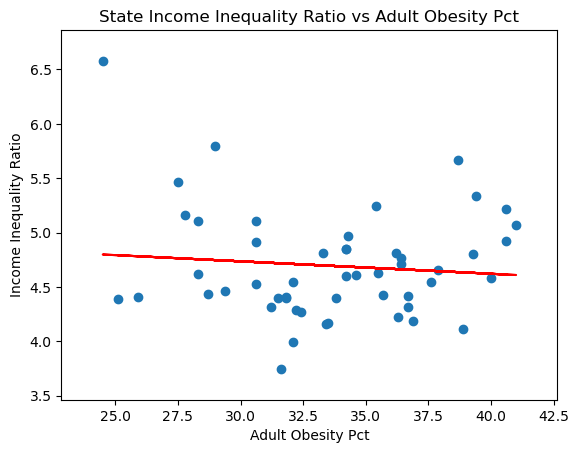

The r^2 value is: 0.009178963450304747


In [56]:
#Exploring State Level Obesity Pct vs Income Inequality Ratio
state_df = state_df.dropna(subset=['adult_obesity_pct','income_inequal_ratio']).copy()
x_values = state_df['adult_obesity_pct']
y_values = state_df['income_inequal_ratio']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

padding_x = 0.1 * (max(x_values) - min(x_values))  # 10% padding for x-axis
padding_y = 0.1 * (max(y_values) - min(y_values))  # 10% padding for y-axis

plt.xlim(min(x_values) - padding_x, max(x_values) + padding_x)
plt.ylim(min(y_values) - padding_y, max(y_values) + padding_y)

plt.title('State Income Inequality Ratio vs Adult Obesity Pct')
plt.xlabel('Adult Obesity Pct')
plt.ylabel('Income Inequality Ratio')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Plot the regression line
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")  # Annotate the line equation

# Call plt.show() as a function to display the plot
plt.show()
print(f'The r^2 value is: {rvalue**2}')

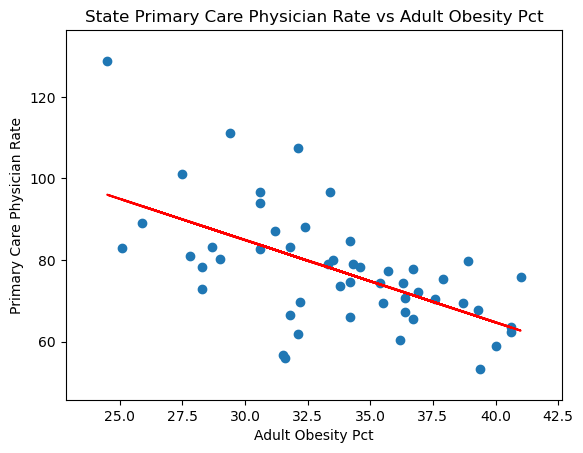

The r^2 value is: 0.3408654231508273


In [57]:
#Exploring State Level Obesity Pct vs Primary Care Physician Rate
state_df = state_df.dropna(subset=['adult_obesity_pct','primary_care_phys_rate']).copy()
x_values = state_df['adult_obesity_pct']
y_values = state_df['primary_care_phys_rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

padding_x = 0.1 * (max(x_values) - min(x_values))  # 10% padding for x-axis
padding_y = 0.1 * (max(y_values) - min(y_values))  # 10% padding for y-axis

plt.xlim(min(x_values) - padding_x, max(x_values) + padding_x)
plt.ylim(min(y_values) - padding_y, max(y_values) + padding_y)

plt.title('State Primary Care Physician Rate vs Adult Obesity Pct')
plt.xlabel('Adult Obesity Pct')
plt.ylabel('Primary Care Physician Rate')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Plot the regression line
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")  # Annotate the line equation

# Call plt.show() as a function to display the plot
plt.show()
print(f'The r^2 value is: {rvalue**2}')

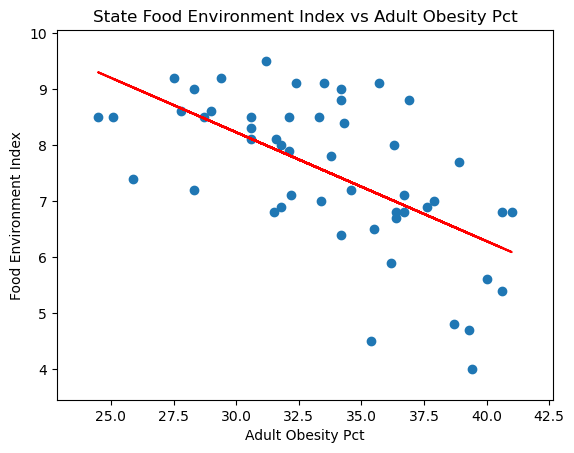

The r^2 value is: 0.3679485296281933


In [58]:
#Exploring State Level Obesity Pct vs Food Environment Index
state_df = state_df.dropna(subset=['adult_obesity_pct','food_environment_index']).copy()
x_values = state_df['adult_obesity_pct']
y_values = state_df['food_environment_index']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

padding_x = 0.1 * (max(x_values) - min(x_values))  # 10% padding for x-axis
padding_y = 0.1 * (max(y_values) - min(y_values))  # 10% padding for y-axis

plt.xlim(min(x_values) - padding_x, max(x_values) + padding_x)
plt.ylim(min(y_values) - padding_y, max(y_values) + padding_y)

plt.title('State Food Environment Index vs Adult Obesity Pct')
plt.xlabel('Adult Obesity Pct')
plt.ylabel('Food Environment Index')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Plot the regression line
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")  # Annotate the line equation

# Call plt.show() as a function to display the plot
plt.show()
print(f'The r^2 value is: {rvalue**2}')

## Early Death Years Lost Analyses

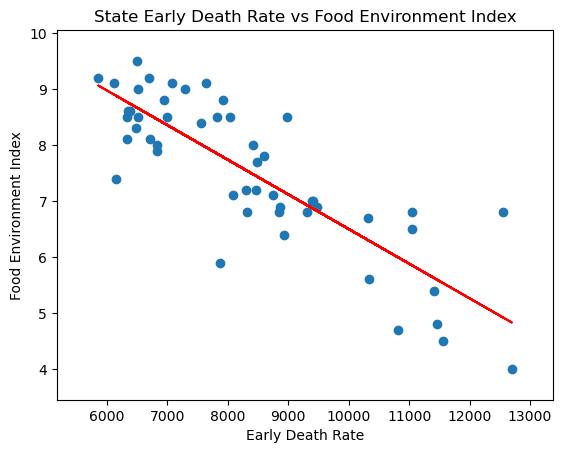

The r^2 value is: 0.6952027674701953


In [57]:
#Exploring State Level Early Death Years Lost vs Food Environment Index
state_df = state_df.dropna(subset=['early_death_years_lost','food_environment_index']).copy()
x_values = state_df['early_death_years_lost']
y_values = state_df['food_environment_index']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

padding_x = 0.1 * (max(x_values) - min(x_values))  # 10% padding for x-axis
padding_y = 0.1 * (max(y_values) - min(y_values))  # 10% padding for y-axis

plt.xlim(min(x_values) - padding_x, max(x_values) + padding_x)
plt.ylim(min(y_values) - padding_y, max(y_values) + padding_y)

plt.title('State Early Death Rate vs Food Environment Index')
plt.xlabel('Early Death Rate')
plt.ylabel('Food Environment Index')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Plot the regression line
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")  # Annotate the line equation

# Call plt.show() as a function to display the plot
plt.show()
print(f'The r^2 value is: {rvalue**2}')

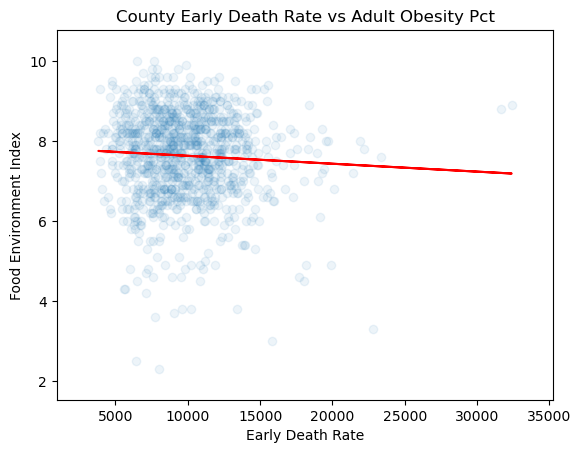

The r^2 value is: 0.003317452928007187


In [59]:
#Exploring County Level Early Death Years Lost vs Food Environment Index
county_df = county_df.dropna(subset=['early_death_years_lost','food_environment_index']).copy()
x_values = county_df['early_death_years_lost'].sample(1000)
y_values = county_df['food_environment_index'].sample(1000)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

padding_x = 0.1 * (max(x_values) - min(x_values))  # 10% padding for x-axis
padding_y = 0.1 * (max(y_values) - min(y_values))  # 10% padding for y-axis

plt.xlim(min(x_values) - padding_x, max(x_values) + padding_x)
plt.ylim(min(y_values) - padding_y, max(y_values) + padding_y)

plt.title('County Early Death Rate vs Adult Obesity Pct')
plt.xlabel('Early Death Rate')
plt.ylabel('Food Environment Index')
plt.scatter(x_values, y_values, alpha=0.08)
plt.plot(x_values, regress_values, "r-")  # Plot the regression line
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")  # Annotate the line equation

# Call plt.show() as a function to display the plot
plt.show()
print(f'The r^2 value is: {rvalue**2}')

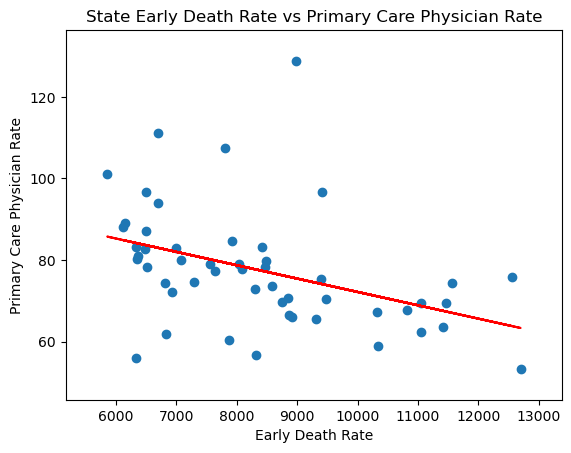

The r^2 value is: 0.1677652578247311


In [44]:
#Exploring State Level Early Death Years Lost vs Primary Care Physician Rate
state_df = state_df.dropna(subset=['early_death_years_lost','primary_care_phys_rate']).copy()
x_values = state_df['early_death_years_lost']
y_values = state_df['primary_care_phys_rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

padding_x = 0.1 * (max(x_values) - min(x_values))  # 10% padding for x-axis
padding_y = 0.1 * (max(y_values) - min(y_values))  # 10% padding for y-axis

plt.xlim(min(x_values) - padding_x, max(x_values) + padding_x)
plt.ylim(min(y_values) - padding_y, max(y_values) + padding_y)

plt.title('State Early Death Rate vs Primary Care Physician Rate')
plt.xlabel('Early Death Rate')
plt.ylabel('Primary Care Physician Rate')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Plot the regression line
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")  # Annotate the line equation

# Call plt.show() as a function to display the plot
plt.show()
print(f'The r^2 value is: {rvalue**2}')

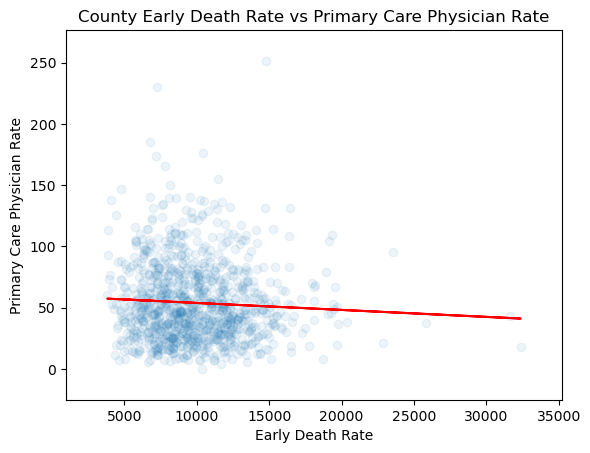

The r^2 value is: 0.0035389795514023576


In [51]:
#Exploring County Level Early Death Years Lost vs Primary Care Physician Rate
county_df = county_df.dropna(subset=['early_death_years_lost','primary_care_phys_rate']).copy()
x_values = county_df['early_death_years_lost'].sample(1000)
y_values = county_df['primary_care_phys_rate'].sample(1000)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

padding_x = 0.1 * (max(x_values) - min(x_values))  # 10% padding for x-axis
padding_y = 0.1 * (max(y_values) - min(y_values))  # 10% padding for y-axis

plt.xlim(min(x_values) - padding_x, max(x_values) + padding_x)
plt.ylim(min(y_values) - padding_y, max(y_values) + padding_y)

plt.title('County Early Death Rate vs Primary Care Physician Rate')
plt.xlabel('Early Death Rate')
plt.ylabel('Primary Care Physician Rate')
plt.scatter(x_values, y_values, alpha=0.08)
plt.plot(x_values, regress_values, "r-")  # Plot the regression line
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")  # Annotate the line equation

# Call plt.show() as a function to display the plot
plt.show()
print(f'The r^2 value is: {rvalue**2}')

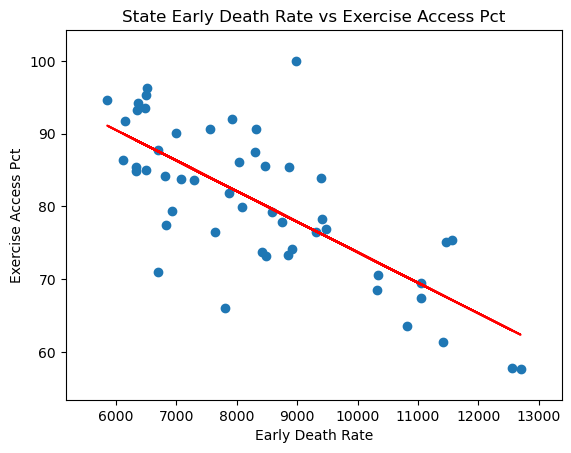

The r^2 value is: 0.549945450720343


In [61]:
#Exploring State Level Early Death Years Lost vs Exercise Access Pct
state_df = state_df.dropna(subset=['early_death_years_lost','exercise_access_pct']).copy()
x_values = state_df['early_death_years_lost']
y_values = state_df['exercise_access_pct']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

padding_x = 0.1 * (max(x_values) - min(x_values))  # 10% padding for x-axis
padding_y = 0.1 * (max(y_values) - min(y_values))  # 10% padding for y-axis

plt.xlim(min(x_values) - padding_x, max(x_values) + padding_x)
plt.ylim(min(y_values) - padding_y, max(y_values) + padding_y)

plt.title('State Early Death Rate vs Exercise Access Pct')
plt.xlabel('Early Death Rate')
plt.ylabel('Exercise Access Pct')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Plot the regression line
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")  # Annotate the line equation

# Call plt.show() as a function to display the plot
plt.show()
print(f'The r^2 value is: {rvalue**2}')

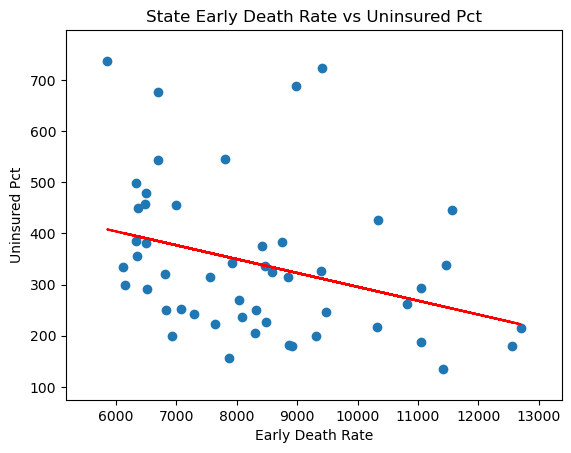

The r^2 value is: 0.110699907042944


In [67]:
#Exploring State Level Early Death Years Lost vs Exercise Access Pct
state_df = state_df.dropna(subset=['early_death_years_lost','mental_health_rate']).copy()
x_values = state_df['early_death_years_lost']
y_values = state_df['mental_health_rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

padding_x = 0.1 * (max(x_values) - min(x_values))  # 10% padding for x-axis
padding_y = 0.1 * (max(y_values) - min(y_values))  # 10% padding for y-axis

plt.xlim(min(x_values) - padding_x, max(x_values) + padding_x)
plt.ylim(min(y_values) - padding_y, max(y_values) + padding_y)

plt.title('State Early Death Rate vs Uninsured Pct')
plt.xlabel('Early Death Rate')
plt.ylabel('Uninsured Pct')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Plot the regression line
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")  # Annotate the line equation

# Call plt.show() as a function to display the plot
plt.show()
print(f'The r^2 value is: {rvalue**2}')

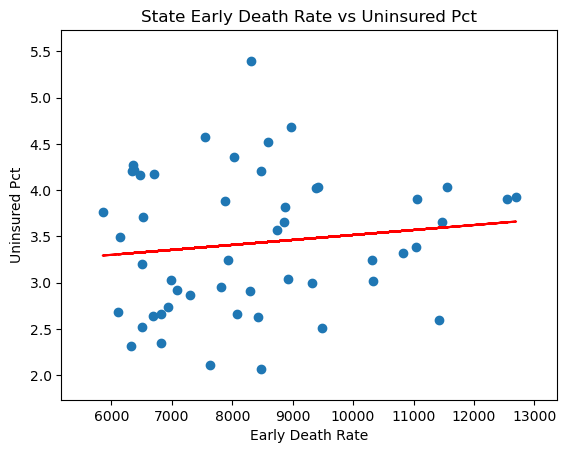

The r^2 value is: 0.016649880434594904


In [66]:
#Exploring State Level Early Death Years Lost vs Exercise Access Pct
state_df = state_df.dropna(subset=['early_death_years_lost','unemployment_pct']).copy()
x_values = state_df['early_death_years_lost']
y_values = state_df['unemployment_pct']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

padding_x = 0.1 * (max(x_values) - min(x_values))  # 10% padding for x-axis
padding_y = 0.1 * (max(y_values) - min(y_values))  # 10% padding for y-axis

plt.xlim(min(x_values) - padding_x, max(x_values) + padding_x)
plt.ylim(min(y_values) - padding_y, max(y_values) + padding_y)

plt.title('State Early Death Rate vs Uninsured Pct')
plt.xlabel('Early Death Rate')
plt.ylabel('Uninsured Pct')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Plot the regression line
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")  # Annotate the line equation

# Call plt.show() as a function to display the plot
plt.show()
print(f'The r^2 value is: {rvalue**2}')